In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
import pickle
import os

mnist = fetch_mldata("MNIST original")
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

def ae_store_name(hidden_units):
    directory = "storedClassifiers"
    name = "AE_MNIST_"
    for i in hidden_units:
        name += str(i)
        name += "-"
    name = name[:-1]
    name += "_hiddenUnits.p"
    return os.path.join(directory,name)


from keras.layers import Input, Dense
from keras.models import Model

hidden_units = 16  

input_layer = Input(shape=(784,))
hidden = Dense(hidden_units, activation='relu')(input_layer)
output_layer = Dense(784, activation='sigmoid')(hidden)

# maps input to its reconstruction
autoencoder = Model(input_layer, output_layer)
# maps input to encoded or compressed representation
encoder = Model(input_layer, hidden)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')



if os.path.isfile(ae_store_name((hidden_units,))):
    autoencoder = pickle.load(open(ae_store_name((hidden_units,)), "rb" ))
else:
    autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

reconstructed_imgs = autoencoder.predict(X_test)

Using TensorFlow backend.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s - loss: 0.3901 - val_loss: 0.2747
Epoch 2/50
60000/60000 [==============================] - 5s - loss: 0.2696 - val_loss: 0.2620
Epoch 3/50
60000/60000 [==============================] - 5s - loss: 0.2537 - val_loss: 0.2425
Epoch 4/50
60000/60000 [==============================] - 5s - loss: 0.2343 - val_loss: 0.2235
Epoch 5/50
60000/60000 [==============================] - 5s - loss: 0.2175 - val_loss: 0.2087
Epoch 6/50
60000/60000 [==============================] - 5s - loss: 0.2047 - val_loss: 0.1979
Epoch 7/50
60000/60000 [==============================] - 5s - loss: 0.1957 - val_loss: 0.1905
Epoch 8/50
60000/60000 [==============================] - 5s - loss: 0.1891 - val_loss: 0.1848
Epoch 9/50
60000/60000 [==============================] - 5s - loss: 0.1838 - val_loss: 0.1799
Epoch 10/50
60000/60000 [==============================] - 5s - loss: 0.1794 - val_loss: 0.1759

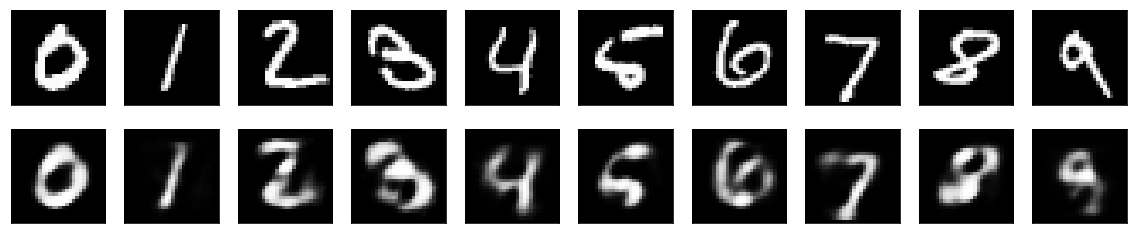

In [2]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[y_test==i][0].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[y_test==i][0].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
